---

# **Advanced Analysis of Textual Data and Hidden Pattern Detection**  

## **Introduction**  

In a world where customer reviews and social media directly influence the perception of a product or brand, **textual data analysis** has become an essential strategic tool. Through advanced **Natural Language Processing (NLP)** techniques, it is possible to extract key insights, detect emerging trends, and anticipate customer needs.  

The objective of this analysis is to **transform raw textual data into actionable insights**, thereby optimizing decision-making and enhancing the personalization of marketing campaigns.  

---  

## **Identifying Trends and Strategic Insights**  

Textual data analysis goes beyond merely reading reviews. It enables the **detection of recurring patterns, hidden relationships, and trend evolution** through advanced **segmentation, clustering, and predictive analysis** approaches.  

The challenge is to **understand what consumers truly think**, **anticipate their expectations**, and **optimize marketing strategies** based on emerging trends.  

---  

## **Methods and Techniques Used**  

### **1 - Correlation and Association Analysis**  
**Objective**: Identify relationships between **customer sentiments, mentioned products, and recurring issues**.  
- **Input**: `reviewText`, `sentiment`, `label`  
- **Output**: Correlations between sentiments and mentioned products, identification of recurring issues.  
- Detect links between negative reviews and specific events (e.g., the release of a new product).  
- Cross-analyze sentiment analysis with entity recognition to identify the most cited brands.  

**Example**: A surge in negative reviews is observed following a software update, allowing the company to anticipate and respond quickly.  

### **2 - Detection of Emerging Trends**  
**Objective**: Analyze the temporal evolution of topics and identify trends before they become mainstream.  
- **Input**: `reviewText`  
- **Output**: Emerging trends based on dominant keywords.  
- Extract **dominant keywords** over a given period.  
- Detect sudden changes in discussions to anticipate a trend.  

**Example**: A rise in mentions of "anti-pollution skincare" in customer reviews enables a cosmetics brand to quickly adapt its product offerings.  

---  

## **Concrete Application Example**  

A cosmetics company seeks to understand **emerging consumer preferences**. By analyzing discussions on **Twitter and customer reviews**, it detects an **increase in mentions of eco-friendly and vegan products**. Leveraging these insights, it decides to **launch an organic product line ahead of competitors**, ensuring an optimal strategic positioning.  

---  

## **Selected NLP Models and Justification**  

| **Step**                          | **Model Used**                                    | **Outcome** |
|----------------------------------|------------------------------------------------|------------------------|
| **Product/Brand Extraction**   | dslim/bert-base-NER                              | List of mentioned products/brands in reviews. |
| **Sentiment Analysis**         | distilbert-base-uncased-finetuned-sst-2-english | Correlations between sentiments and products/brands. |
| **Issue Identification**       | sentence-transformers/all-MiniLM-L6-v2          | List of recurring issues and their frequency in negative reviews. |
| **Extraction of Dominant Keywords** | sentence-transformers/all-MiniLM-L6-v2          | Clustering of reviews and extraction of dominant keywords. |
| **Summary Generation**         | facebook/bart-large-cnn                         | Informative summaries for each review cluster. |
| **Trend Detection**            | sentence-transformers/all-MiniLM-L6-v2          | Identification of emerging trends by comparing clusters. |  

---  

## **Conclusion**  

Advanced textual data analysis through **NLP models and segmentation techniques** enables the **transformation of raw data into actionable insights**.  

- **Enhanced personalization of marketing campaigns.**  
- **Informed decision-making based on trend analysis.**  
- **Increased responsiveness to market changes.**  

This work is **crucial** for effectively leveraging data in the next phases of the **MarketMind** project.  

---



---

# **I. Data Acquisition**  

### **Data Sources**  
- Customer reviews (Amazon, Trustpilot, etc.)  
- Social media (Twitter, Reddit)  

### **Collection Methods**  
- **Web Scraping**: Automated extraction of reviews from online platforms.  
- **Databases**: Use of public datasets.  

---



## 1- Import Libraries

In [ ]:
!pip install cufflinks

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 31.3 MB/s eta 0:00:00


In [ ]:
!pip uninstall -y pyarrow
!pip install --no-cache-dir pyarrow

Found existing installation: pyarrow 18.1.0
Uninstalling pyarrow-18.1.0:
  Successfully uninstalled pyarrow-18.1.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.1/42.1 MB 194.7 MB/s eta 0:00:00


In [ ]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 487.4/487.4 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 18.0 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.0
    Uninstalling fsspec-2025.3.0:
      Successfully uninstalled fsspec-2025.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system 

In [3]:
# Importation des bibliothèques
import json
import pandas as pd
from tqdm import tqdm  # Pour afficher une barre de progression
import matplotlib.pyplot as plt  # Pour la visualisation des données
import seaborn as sns  # Pour des graphiques plus attrayants
from wordcloud import WordCloud  # Pour créer des nuages de mots
from collections import Counter  # Pour compter les mots les plus fréquents
from nltk.corpus import stopwords  # Pour supprimer les stopwords
from nltk.stem import WordNetLemmatizer  # Pour la lemmatisation
import nltk
#NLTK libraries
from nltk.stem import WordNetLemmatizer
import nltk
import re
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud,STOPWORDS
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Téléchargement des ressources NLTK
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
import cufflinks as cf
cf.go_offline()
cf.set_config_file(world_readable=True)
from collections import defaultdict
import pandas as pd
from tqdm import tqdm
from sklearn.utils import resample


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


## 2- Loading Data  

CSV files containing customer reviews are loaded and processed for analysis.  


In [19]:
# Conversion en DataFrame
Data_BO1 = pd.read_csv("data_BO1.csv")

In [20]:

# Affichage des premières lignes du DataFrame
print("\nPremières lignes du DataFrame :")
Data_BO1.head()


Premières lignes du DataFrame :


,reviewText,overall,category,summary,reviewText_length,word_count,sentiment,label
0,waterpik total alternative traditional flossin...,5.0,All_Beauty_5,must brace,707,111,positif,2
1,masculine smell perfect camping festival etc d...,5.0,All_Beauty_5,hair body wash,104,14,positif,2
2,love hard find lotionfragrance well feel lotio...,5.0,All_Beauty_5,escada moon sparkle,133,20,positif,2
3,use winter beautiful fragrance seems bit much ...,5.0,All_Beauty_5,wonderful stuff,132,18,positif,2
4,colgate favorite brand toothpaste family alway...,4.0,All_Beauty_5,offer many benefit growing adult teeth,819,111,positif,2


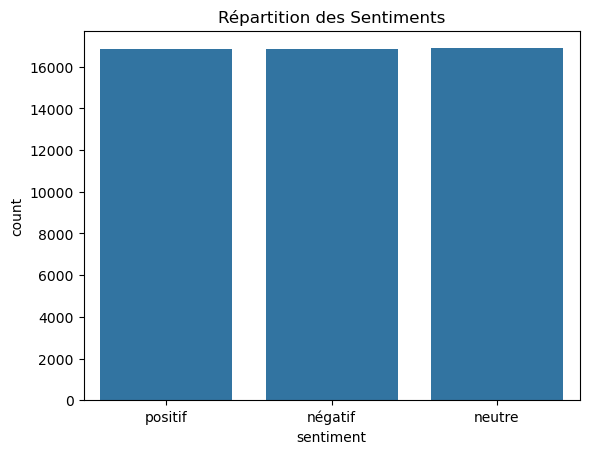

In [21]:
sns.countplot(x='sentiment', data=Data_BO1)
plt.title("Répartition des Sentiments")
plt.show()

In [25]:
print(Data_BO1['sentiment'].value_counts())

sentiment
neutre     16884
positif    16867
négatif    16867
Name: count, dtype: int64


# **V. Data Splitting**

### **1- Data Splitting**  
Split your data into training, validation, and test sets.

In [29]:
from sklearn.model_selection import train_test_split
train_df, temp_df = train_test_split(Data_BO1, test_size=0.2, random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)

In [31]:
# Affichage des tailles des ensembles
print(f"Taille de l'ensemble d'entraînement : {len(train_df)}")
print(f"Taille de l'ensemble de validation : {len(val_df)}")
print(f"Taille de l'ensemble de test : {len(test_df)}")

Taille de l'ensemble d'entraînement : 40494
Taille de l'ensemble de validation : 5062
Taille de l'ensemble de test : 5062


### **2- Saving Cleaned Data**  
Save the cleaned data for use in model fine-tuning.

In [34]:
train_df.to_csv('train_data_BO1.csv', index=False)
val_df.to_csv('val_data_BO1.csv', index=False)
test_df.to_csv('test_data_BO1.csv', index=False)

### **3- Conversion to Hugging Face Compatible Format**  
The Hugging Face model requires a specific format for the data. We will convert the DataFrames into Dataset objects.

In [37]:
from datasets import Dataset

# Conversion en format Dataset
train_dataset = Dataset.from_pandas(train_df)
val_dataset = Dataset.from_pandas(val_df)
test_dataset = Dataset.from_pandas(test_df)

# Affichage des informations sur les datasets
print(train_dataset)
print(val_dataset)
print(test_dataset)

Dataset({
    features: ['reviewText', 'overall', 'category', 'summary', 'reviewText_length', 'word_count', 'sentiment', 'label', '__index_level_0__'],
    num_rows: 40494
})
Dataset({
    features: ['reviewText', 'overall', 'category', 'summary', 'reviewText_length', 'word_count', 'sentiment', 'label', '__index_level_0__'],
    num_rows: 5062
})
Dataset({
    features: ['reviewText', 'overall', 'category', 'summary', 'reviewText_length', 'word_count', 'sentiment', 'label', '__index_level_0__'],
    num_rows: 5062
})


# Modeling

# **Fine-Tuning NLP Models with Hugging Face**  
Structure the fine-tuning of NLP models.